In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape : (10000, 32, 32, 3)
y_test shape : (10000, 1)


In [ ]:
label_names = [
    "aluminum_can", "plastic_bottle", "glass_jar", "paper_carton", "steel_can",
    "cardboard", "plastic_bag", "textile", "e_waste", "other_plastic"
]

In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0


In [ ]:
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)


In [ ]:
def build_modified_cnn(input_shape=(32,32,3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),   # Dropout helps reduce overfitting
        layers.Dense(num_classes, activation='softmax')
    ])
    return model
model = build_modified_cnn()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,176,394 (8.30 MB)

 Trainable params: 2,176,010 (8.30 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
]

history = model.fit(
    X_train, y_train_cat,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/30
625/625 - 12s - 20ms/step - accuracy: 0.3737 - loss: 1.7958 - val_accuracy: 0.4393 - val_loss: 1.7347
Epoch 2/30
625/625 - 4s - 7ms/step - accuracy: 0.5018 - loss: 1.3899 - val_accuracy: 0.5409 - val_loss: 1.2616
Epoch 3/30
625/625 - 4s - 7ms/step - accuracy: 0.5702 - loss: 1.2130 - val_accuracy: 0.5451 - val_loss: 1.4765
Epoch 4/30
625/625 - 4s - 7ms/step - accuracy: 0.6133 - loss: 1.0994 - val_accuracy: 0.6523 - val_loss: 0.9781
Epoch 5/30
625/625 - 4s - 7ms/step - accuracy: 0.6478 - loss: 1.0033 - val_accuracy: 0.6335 - val_loss: 1.0344
Epoch 6/30
625/625 - 4s - 7ms/step - accuracy: 0.6866 - loss: 0.8953 - val_accuracy: 0.6528 - val_loss: 1.0253
Epoch 7/30
625/625 - 6s - 9ms/step - accuracy: 0.7119 - loss: 0.8249 - val_accuracy: 0.6197 - val_loss: 1.1745
Epoch 8/30
625/625 - 5s - 8ms/step - accuracy: 0.7369 - loss: 0.7538 - val_accuracy: 0.6491 - val_loss: 1.0540
Epoch 9/30
625/625 - 10s - 15ms/step - accuracy: 0.7576 - loss: 0.6888 - val_accuracy: 0.7262 - val_loss: 0.84

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

train_acc = history.history['accuracy'][-1]
val_acc   = max(history.history['val_accuracy'])
print(f"Final training accuracy: {train_acc:.4f}")
print(f"Best validation accuracy: {val_acc:.4f}")



Test accuracy: 0.7203, Test loss: 0.8568
Final training accuracy: 0.8326
Best validation accuracy: 0.7262



 Classification Report:
                precision    recall  f1-score   support

  aluminum_can     0.7303    0.7690    0.7491      1000
plastic_bottle     0.8327    0.8610    0.8466      1000
     glass_jar     0.6696    0.5290    0.5911      1000
  paper_carton     0.4995    0.5220    0.5105      1000
     steel_can     0.7152    0.6380    0.6744      1000
     cardboard     0.5700    0.6640    0.6134      1000
   plastic_bag     0.7964    0.7860    0.7911      1000
       textile     0.7366    0.8250    0.7783      1000
       e_waste     0.8363    0.8330    0.8347      1000
 other_plastic     0.8453    0.7760    0.8092      1000

      accuracy                         0.7203     10000
     macro avg     0.7232    0.7203    0.7198     10000
  weighted avg     0.7232    0.7203    0.7198     10000



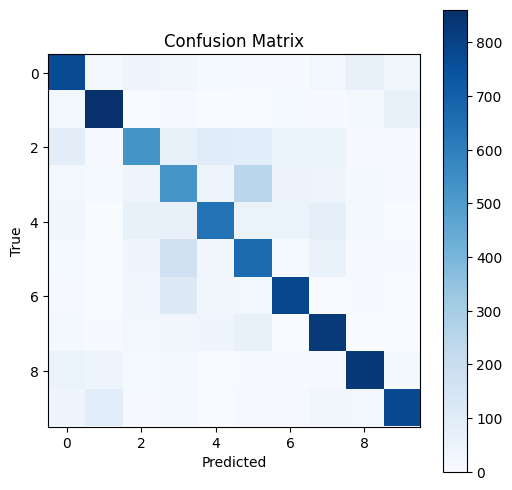

In [ ]:
y_prob = model.predict(X_test, batch_size=256, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = y_test.flatten()

print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_names, digits=4))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()


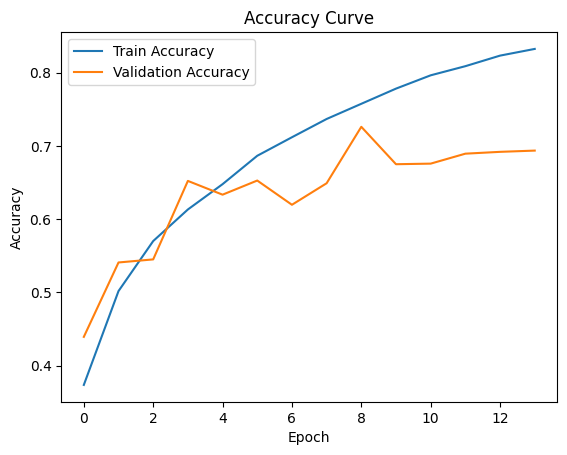

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

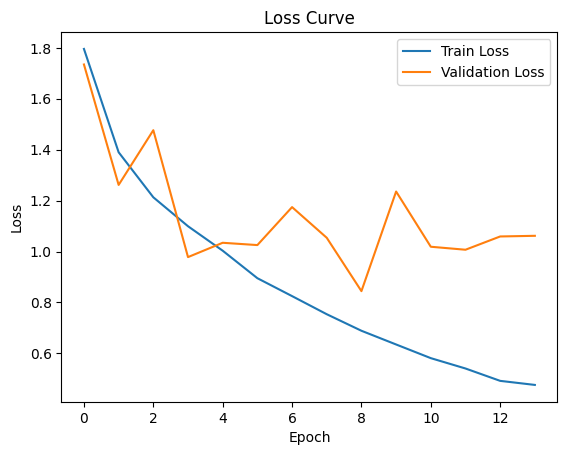

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()